# "Визуализация данных"

Вам необходимо провести базовый EDA выбранного набора данных.
Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?)
- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [36]:
showsByType = netflix[['show_id', 'type']].groupby('type').count()

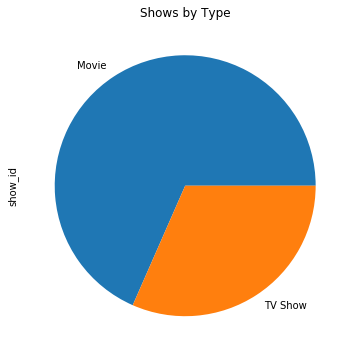

In [37]:
showsByType.show_id.plot(kind='pie',
                          title='Shows by Type')

In [39]:
showsByReleaseYear = pd.pivot_table(netflix, 
                                    values='title', 
                                    index=['release_year'], 
                                    columns=['type'], 
                                    aggfunc=np.size)

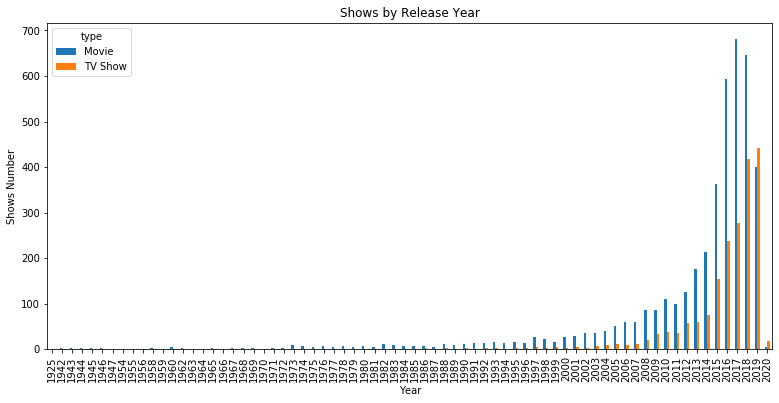

In [45]:
x = showsByReleaseYear.plot(kind='bar',
                        title='Shows by Release Year'                      
                       )
x.set_xlabel('Year')
x.set_ylabel('Shows Number')
x

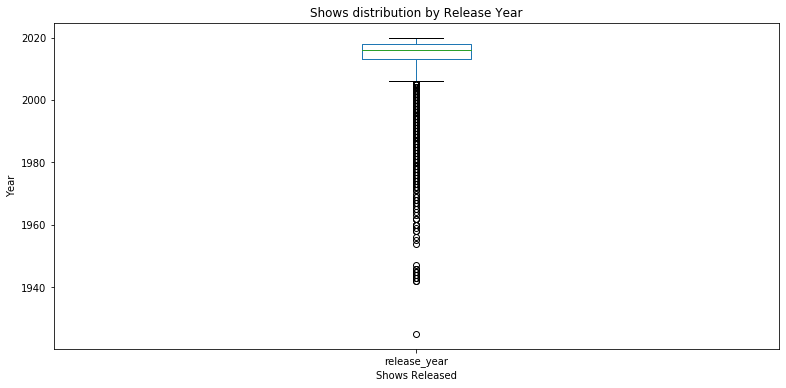

In [51]:
x = netflix.release_year.plot(kind='box',
                        title='Shows distribution by Release Year'                      
                       )
x.set_xlabel('Shows Released')
x.set_ylabel('Year')
x

In [62]:
showsByCountry = netflix[['show_id', 'country']].groupby('country').count().sort_values(by='show_id', ascending = False).head(10)

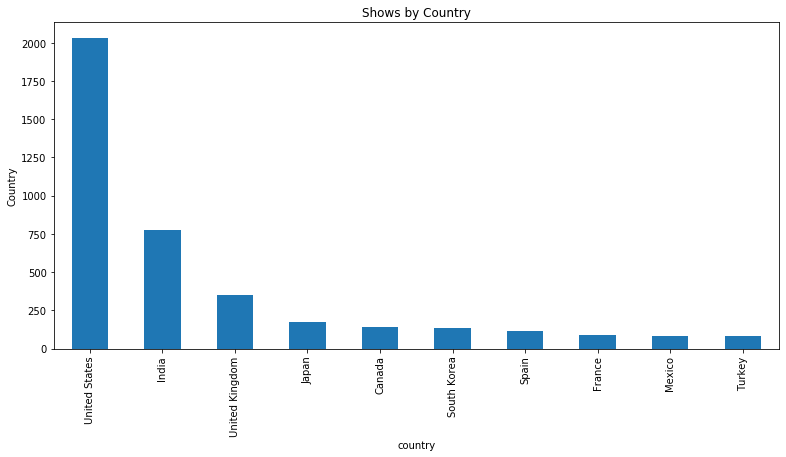

In [64]:
x = showsByCountry.show_id.plot(kind='bar',
                          title='Shows by Country')
x.set_ylabel('Shows Number')
x.set_ylabel('Country')
x

In [77]:
categories = pd.concat([pd.Series(row['show_id'], row['listed_in'].split(',')) 
           for _, row in netflix.iterrows()]).reset_index()

In [97]:
categories_groupped = categories.rename(columns={'index': 'category', '0': 'show_id'}).groupby('category').count()

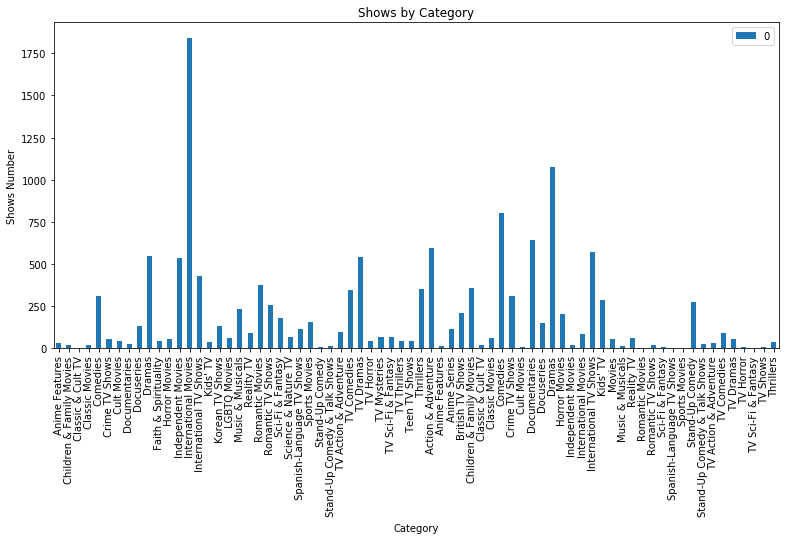

In [99]:
x = categories_groupped.plot(kind='bar',
                                title='Shows by Category')
x.set_ylabel('Shows Number')
x.set_xlabel('Category')
x

# Выводы

- Не смотря на то, что на платформе есть фильмы и шоу, вышедшие почти каждый год, начиная с 1940-х, в основном представлены современные фильмы и шоу, снятые после 2000 года
- Большинство контента на платформе - это фильмы, однако с 2015 года начало резко расти количество сериалов
- И в итоге, в 2019 году на платформе появилось больше сериалов, чем фильмов
- Подавляющее число шоу снято в США, в тройке лидеров также Индия и Великобритания
- По категориям лидируют драмы, комедии, документалки и боевики